MEMBER :
* Steve Reynard Prasetyo - 0706022310027
* Valentyno Marcel Gunawan  0706022310029



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Valentyno02/DataMining_ValentynoMarcelGunawan_0706022310029/refs/heads/main/MFG10YearTerminationData.csv")
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [ ]:
print(df.isnull().sum())


EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64


In [ ]:
print("--- Unique values for all columns ---")
for col in df.columns:
    if df[col].nunique() < 50: # Arbitrary threshold for displaying all unique values
        print(f"Unique values for {col}: {df[col].unique()}")
    else:
        print(f"Column '{col}' has {df[col].nunique()} unique values.")

--- Unique values for all columns ---
Column 'EmployeeID' has 6284 unique values.
Column 'recorddate_key' has 130 unique values.
Column 'birthdate_key' has 5342 unique values.
Column 'orighiredate_key' has 4415 unique values.
Column 'terminationdate_key' has 1055 unique values.
Unique values for age: [52 53 54 55 56 57 58 59 60 61 49 50 51 47 48 44 45 46 42 43 39 40 41 62
 63 64 65 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19]
Unique values for length_of_service: [17 18 19 20 21 22 23 24 25 26 16 15 14 13 12 11 10  9  8  7  6  5  4  3
  2  1  0]
Unique values for city_name: ['Vancouver' 'Terrace' 'Nanaimo' 'Nelson' 'Kelowna' 'Victoria' 'Kamloops'
 'Fort St John' 'Surrey' 'Vernon' 'Quesnel' 'Chilliwack' 'Dawson Creek'
 'Squamish' 'New Westminster' 'Port Coquitlam' 'Cortes Island' 'Burnaby'
 'Bella Bella' 'Cranbrook' 'Williams Lake' 'Trail' 'Prince George'
 'Richmond' 'Grand Forks' 'West Vancouver' 'Abbotsford' 'Aldergrove'
 'Langley' 'North Vancouver' 'White Rock' 'New We

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [ ]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


# VISUALIZATION


/tmp/ipython-input-2887452938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=terminated_employees_df, x='termreason_desc', palette='viridis')


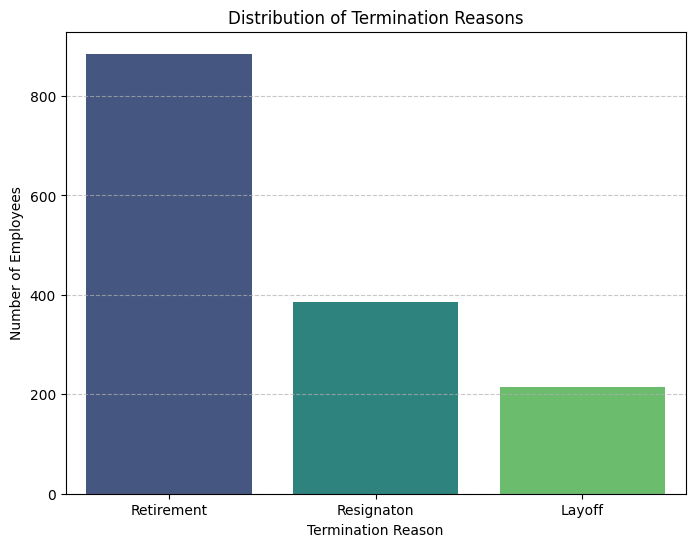

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=terminated_employees_df, x='termreason_desc', palette='viridis')
plt.title('Distribution of Termination Reasons')
plt.xlabel('Termination Reason')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

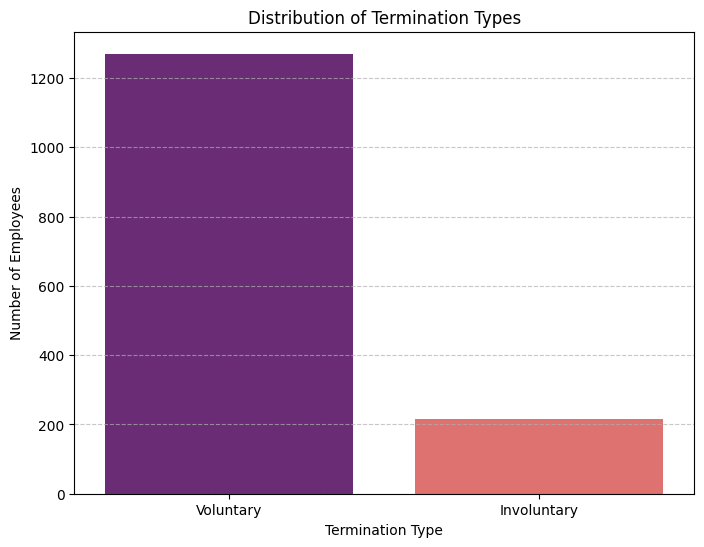

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=terminated_employees_df, x='termtype_desc', hue='termtype_desc', palette='magma', legend=False)
plt.title('Distribution of Termination Types')
plt.xlabel('Termination Type')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was filtered to focus on terminated employees.
*   **Termination Reasons:** The most common termination reason is Retirement (885 employees), followed by Resignation (385 employees), and Layoff (215 employees).
*   **Termination Types:** Voluntary terminations account for a significant majority with 1270 employees, while Involuntary terminations affect 215 employees.
*   **Reason-Type Relationship:** Voluntary terminations are composed of all Retirements and Resignations (885 + 385 = 1270), and Involuntary terminations are exclusively due to Layoffs (215).
*   Visualizations effectively confirm these distributions, showing 'Retirement' as the predominant reason and 'Voluntary' as the overwhelming termination type.


## Visualize Age Distribution by Termination Reason




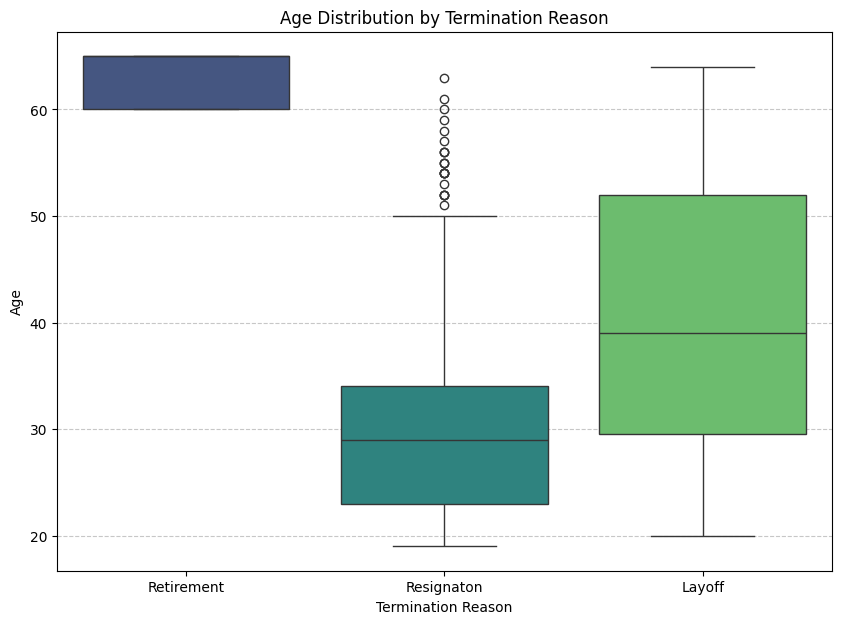

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=terminated_employees_df, x='termreason_desc', y='age', hue='termreason_desc', palette='viridis', legend=False)
plt.title('Age Distribution by Termination Reason')
plt.xlabel('Termination Reason')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Initialize the Decision Tree Classifier with 'gini' criterion
dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
dtc_model.fit(X_train, y_train)

print("Decision Tree Classifier model trained successfully!")

Decision Tree Classifier model trained successfully!


In [ ]:
# Make predictions on the test set
y_pred = dtc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9978

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      0.99      1.00       152

    accuracy                           1.00       446
   macro avg       1.00      1.00      1.00       446
weighted avg       1.00      1.00      1.00       446


Confusion Matrix:
[[294   0]
 [  1 151]]


### Interpretation of Age Distribution by Termination Reason

This box plot visualizes the distribution of employee ages for each termination reason: Retirement, Resignation, and Layoff.

*   **Retirement**: As expected, the box plot for 'Retirement' shows a significantly higher age range, with most retirees being in their late 50s to mid-60s. This confirms that retirement is primarily an event for older employees.

*   **Resignation**: Employees who 'Resign' tend to be younger, with a wider age distribution. The median age for resignations is considerably lower than for retirements, suggesting that employees in their prime working years (e.g., 30s and 40s) are more likely to voluntarily leave the company for reasons other than retirement. This could indicate career changes, better opportunities, or dissatisfaction.

*   **Layoff**: 'Layoff' shows an age distribution that is somewhat in between resignations and retirements, but generally skewed towards a younger demographic than retirement. This indicates that layoffs affect a broader age range, but perhaps less concentrated at the very end of a career compared to retirement.

**Insights**: This visualization provides critical insights into the demographic segments affected by different termination reasons. For instance, the company might need to investigate the factors driving resignations among younger to middle-aged employees to improve retention. For retirements, this pattern is natural, but workforce planning for knowledge transfer from these experienced employees is crucial. Layoffs, while impacting various age groups, could prompt analysis into which roles or departments are more vulnerable.

## Visualize Age vs. Length of Service by Termination Reason


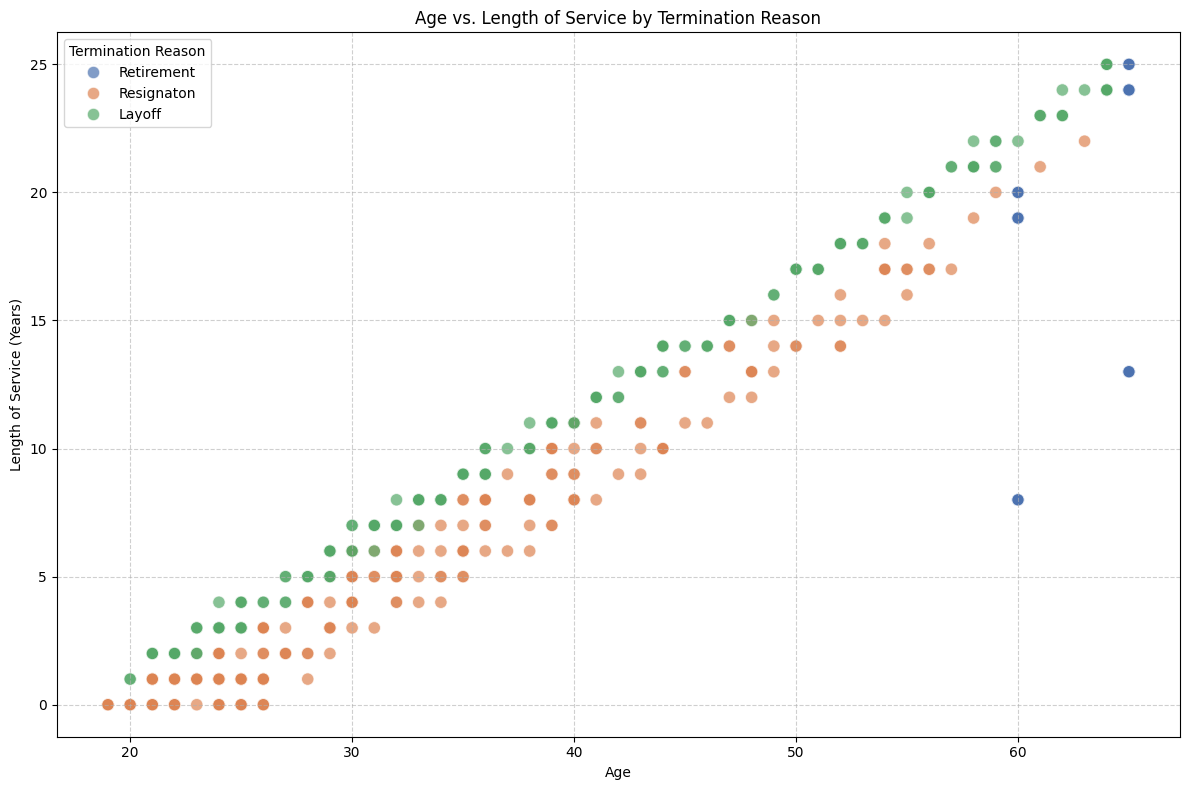

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=terminated_employees_df, x='age', y='length_of_service', hue='termreason_desc', palette='deep', s=80, alpha=0.7)
plt.title('Age vs. Length of Service by Termination Reason')
plt.xlabel('Age')
plt.ylabel('Length of Service (Years)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Termination Reason')
plt.tight_layout()
plt.show()

### Interpretation of Age vs. Length of Service by Termination Reason

This scatter plot illustrates the relationship between an employee's age and their length of service at the company, differentiated by their termination reason.

*   **Retirement (blue points)**: As expected, employees terminating due to retirement generally cluster in the upper right portion of the graph, indicating higher ages and longer lengths of service. This forms a clear diagonal trend, where older employees have proportionally longer tenures, which aligns with typical career progression towards retirement.

*   **Resignation (orange points)**: Resignations are distributed more broadly across the plot, but a significant concentration is seen among younger to middle-aged employees with varying lengths of service. This suggests that resignations can occur at various points in an employee's career, from early-career individuals to those with substantial experience but who are not yet at retirement age.

*   **Layoff (green points)**: Layoffs appear to affect a wide range of ages and lengths of service. There isn't a single strong cluster, indicating that layoffs can impact employees across different experience levels and age groups. However, there might be some tendency towards mid-career employees, but it's less distinct than retirement.

**Insights**: This visualization reinforces that retirement is a planned event for long-tenured, older employees. Resignations, being more widespread, highlight the importance of understanding factors that lead employees of all ages and tenures to voluntarily leave. Layoffs, affecting a diverse group, might suggest that these decisions are based on factors other than just age or tenure, such as departmental restructuring or economic conditions.

## Visualize Termination Reasons by Department


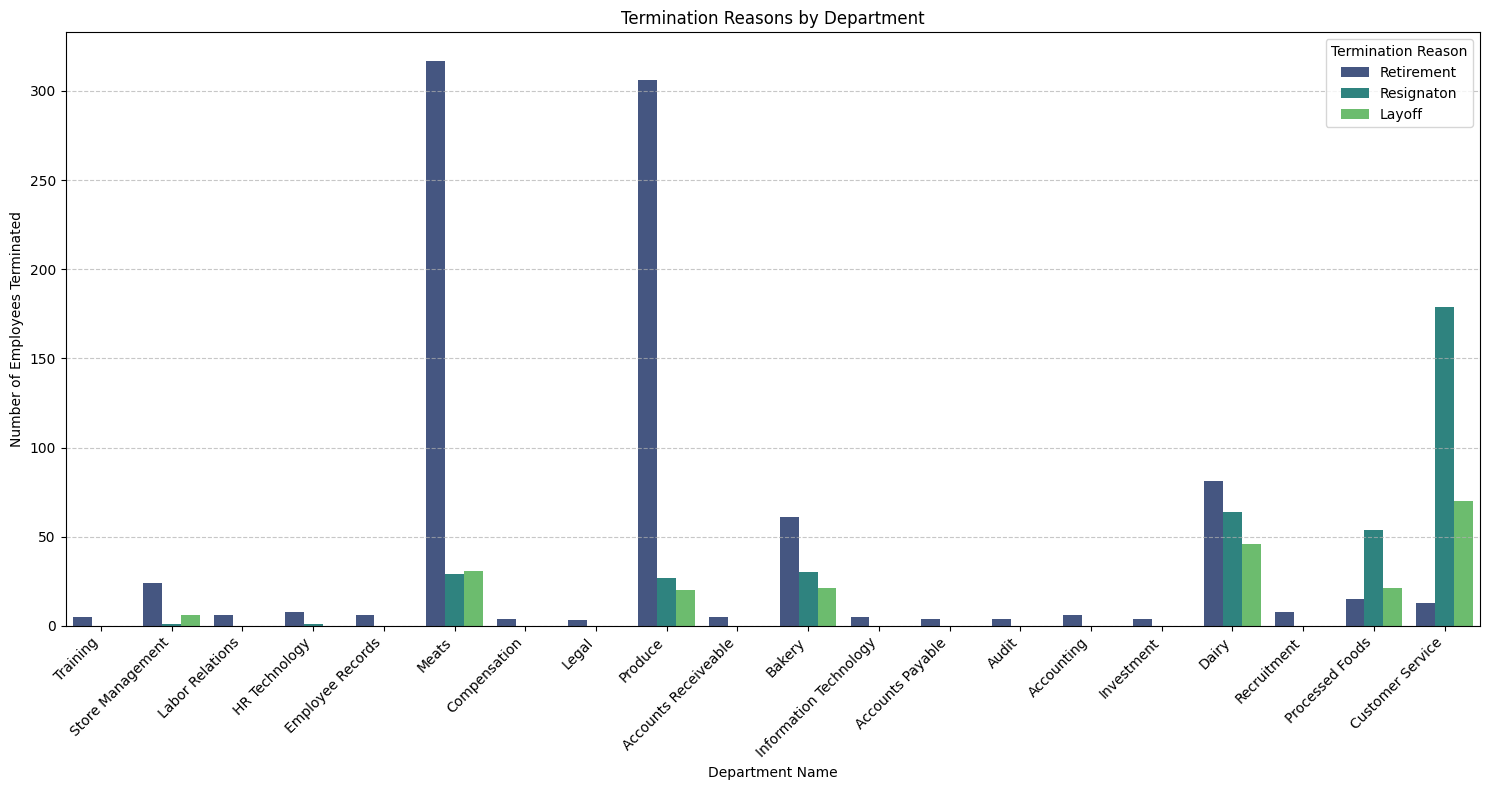

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=terminated_employees_df, x='department_name', hue='termreason_desc', palette='viridis')
plt.title('Termination Reasons by Department')
plt.xlabel('Department Name')
plt.ylabel('Number of Employees Terminated')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Termination Reason')
plt.tight_layout()
plt.show()

### Interpretation of Termination Reasons by Department

This grouped bar chart displays the count of terminated employees for each `termreason_desc` across various `department_name`s.

*   **General Trends**: We can observe that 'Retirement' is a significant reason for termination across many departments, especially in departments like 'Executive' and 'Store Management', indicating a prevalence of older, long-tenured employees in these areas.

*   **Resignations**: 'Resignations' appear to be more distributed across departments. Some departments might show a relatively higher proportion of resignations compared to others, which could indicate issues like job satisfaction, workload, or career advancement opportunities within those specific departments. For instance, if 'Recruitment' or 'Customer Service' departments show high resignation rates, it might be worth investigating the working conditions or career paths there.

*   **Layoffs**: 'Layoffs' seem to occur less frequently than retirements and resignations, but their presence in certain departments could point to restructuring, economic downturns, or performance issues affecting specific parts of the business. For example, if 'Information Technology' or 'Accounts Receiveable' have noticeable layoff bars, it might suggest technological shifts or financial streamlining efforts.

**Insights**: This visualization allows management to pinpoint departments that might require specific attention regarding employee retention, workforce planning (especially for retirements), or restructuring efforts. It provides a departmental breakdown that was not evident in the overall termination reason distributions, enabling more targeted interventions.

## Feature Engineering



In [ ]:
#BUAT DATAFRAME BARU, DAN MEMILIH KOLOM KOLOM YANG KIRA KIRA COCOK UNTUK DI CLUSTERINGKAN, LALU MENAMPILKAN SMUANYA
terminated_employees_df = df[df['STATUS'] == 'TERMINATED'].copy()

clustering_data = terminated_employees_df[['age', 'length_of_service', 'store_name',
                                           'city_name', 'department_name', 'job_title',
                                           'gender_full', 'BUSINESS_UNIT']].copy()

print("Shape of terminated_employees_df:", terminated_employees_df.shape)
print("Shape of clustering_data:", clustering_data.shape)
print("First 5 rows of clustering_data:")
print(clustering_data.head())

Shape of terminated_employees_df: (1485, 18)
Shape of clustering_data: (1485, 8)
First 5 rows of clustering_data:
       age  length_of_service  store_name  city_name   department_name  \
48168   60                 19          35  Vancouver          Training   
48169   65                 24          19     Nelson  Store Management   
48170   60                 19          16    Kelowna  Store Management   
48171   60                 19          35  Vancouver   Labor Relations   
48172   65                 24          37   Victoria  Store Management   

                       job_title gender_full BUSINESS_UNIT  
48168         Director, Training        Male    HEADOFFICE  
48169              Store Manager      Female        STORES  
48170              Store Manager        Male        STORES  
48171  Director, Labor Relations        Male    HEADOFFICE  
48172              Store Manager      Female        STORES  


In [ ]:
#MEMBREAKDOWN KOLOM TSBT MENJADI 2 KATEGORI, NUMERICAL DAN CATEGORICAL
numerical_cols = ['age', 'length_of_service', 'store_name']
categorical_cols = ['city_name', 'department_name', 'job_title', 'gender_full', 'BUSINESS_UNIT']

print("Numerical columns identified:", numerical_cols)
print("Categorical columns identified:", categorical_cols)


Numerical columns identified: ['age', 'length_of_service', 'store_name']
Categorical columns identified: ['city_name', 'department_name', 'job_title', 'gender_full', 'BUSINESS_UNIT']


In [ ]:
#MENJALAKAN MODEL CLUSTERING DAN MENAMPILKAN HASIL NYA LANGSUNG
clustering_data_encoded = pd.get_dummies(clustering_data, columns=categorical_cols, drop_first=True)

print("Shape of clustering_data after one-hot encoding:", clustering_data_encoded.shape)
print("First 5 rows of clustering_data after one-hot encoding:")
print(clustering_data_encoded.head())

Shape of clustering_data after one-hot encoding: (1485, 98)
First 5 rows of clustering_data after one-hot encoding:
       age  length_of_service  store_name  city_name_Aldergrove  \
48168   60                 19          35                 False   
48169   65                 24          19                 False   
48170   60                 19          16                 False   
48171   60                 19          35                 False   
48172   65                 24          37                 False   

       city_name_Bella Bella  city_name_Blue River  city_name_Burnaby  \
48168                  False                 False              False   
48169                  False                 False              False   
48170                  False                 False              False   
48171                  False                 False              False   
48172                  False                 False              False   

       city_name_Chilliwack  city_name_Cor

In [ ]:
#MELIHAT HASIL MENGGUNAKAN STANDARDSCALER
scaler = StandardScaler()
clustering_data_scaled = clustering_data_encoded.copy()
clustering_data_scaled[numerical_cols] = scaler.fit_transform(clustering_data_encoded[numerical_cols])

print("First 5 rows of clustering_data after scaling numerical columns:")
print(clustering_data_scaled.head())
print("Mean of scaled numerical columns:\n", clustering_data_scaled[numerical_cols].mean())
print("Standard deviation of scaled numerical columns:\n", clustering_data_scaled[numerical_cols].std())

First 5 rows of clustering_data after scaling numerical columns:
            age  length_of_service  store_name  city_name_Aldergrove  \
48168  0.517279           1.133817    0.793315                 False   
48169  0.820086           1.876263   -0.558073                 False   
48170  0.517279           1.133817   -0.811459                 False   
48171  0.517279           1.133817    0.793315                 False   
48172  0.820086           1.876263    0.962239                 False   

       city_name_Bella Bella  city_name_Blue River  city_name_Burnaby  \
48168                  False                 False              False   
48169                  False                 False              False   
48170                  False                 False              False   
48171                  False                 False              False   
48172                  False                 False              False   

       city_name_Chilliwack  city_name_Cortes Island  city_name

## K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
max_clusters = 10 # Define a reasonable range for number of clusters

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(clustering_data_scaled)
    silhouette_avg = silhouette_score(clustering_data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2 # +2 because range starts from 2
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_clusters}")

For n_clusters = 2, the average silhouette_score is : 0.2799
For n_clusters = 3, the average silhouette_score is : 0.2023
For n_clusters = 4, the average silhouette_score is : 0.2150
For n_clusters = 5, the average silhouette_score is : 0.2070
For n_clusters = 6, the average silhouette_score is : 0.2108
For n_clusters = 7, the average silhouette_score is : 0.2129
For n_clusters = 8, the average silhouette_score is : 0.2199
For n_clusters = 9, the average silhouette_score is : 0.2160
For n_clusters = 10, the average silhouette_score is : 0.2112

Optimal number of clusters based on Silhouette Score: 2


In [ ]:
optimal_clusters = 2 # From previous step's output

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clustering_data['cluster'] = kmeans.fit_predict(clustering_data_scaled)

print(f"K-Means clustering applied with {optimal_clusters} clusters.")
print("Cluster distribution:")
print(clustering_data['cluster'].value_counts())
print("First 5 rows of clustering_data with assigned clusters:")
print(clustering_data.head())

K-Means clustering applied with 2 clusters.
Cluster distribution:
cluster
0    1033
1     452
Name: count, dtype: int64
First 5 rows of clustering_data with assigned clusters:
       age  length_of_service  store_name  city_name   department_name  \
48168   60                 19          35  Vancouver          Training   
48169   65                 24          19     Nelson  Store Management   
48170   60                 19          16    Kelowna  Store Management   
48171   60                 19          35  Vancouver   Labor Relations   
48172   65                 24          37   Victoria  Store Management   

                       job_title gender_full BUSINESS_UNIT  cluster  
48168         Director, Training        Male    HEADOFFICE        0  
48169              Store Manager      Female        STORES        0  
48170              Store Manager        Male        STORES        0  
48171  Director, Labor Relations        Male    HEADOFFICE        0  
48172              Store Mana

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Re-define variables from previous cells to ensure execution context is complete
# (assuming df is already loaded)

terminated_employees_df = df[df['STATUS'] == 'TERMINATED'].copy()
clustering_data = terminated_employees_df[['age', 'length_of_service', 'store_name',
                                           'city_name', 'department_name', 'job_title',
                                           'gender_full', 'BUSINESS_UNIT']].copy()

numerical_cols = ['age', 'length_of_service', 'store_name']
categorical_cols = ['city_name', 'department_name', 'job_title', 'gender_full', 'BUSINESS_UNIT']

clustering_data_encoded = pd.get_dummies(clustering_data, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
clustering_data_scaled = clustering_data_encoded.copy()
clustering_data_scaled[numerical_cols] = scaler.fit_transform(clustering_data_encoded[numerical_cols])

optimal_clusters = 2 # Based on previous Silhouette Score analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clustering_data['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Define features (X) and target (y)
X = clustering_data_scaled
y = clustering_data['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1039, 98)
X_test shape: (446, 98)
y_train shape: (1039,)
y_test shape: (446,)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Add the cluster labels to the PCA DataFrame for visualization
pca_df['cluster'] = clustering_data['cluster'].reset_index(drop=True)

print("Shape of PCA transformed data:", pca_df.shape)
print("First 5 rows of PCA data with clusters:")
print(pca_df.head())


Shape of PCA transformed data: (1485, 3)
First 5 rows of PCA data with clusters:
   principal_component_1  principal_component_2  cluster
0               1.164188               0.910869        0
1               1.784968              -0.688779        0
2               0.996493              -0.899145        0
3               1.164590               0.911437        0
4               1.901103               0.861214        0


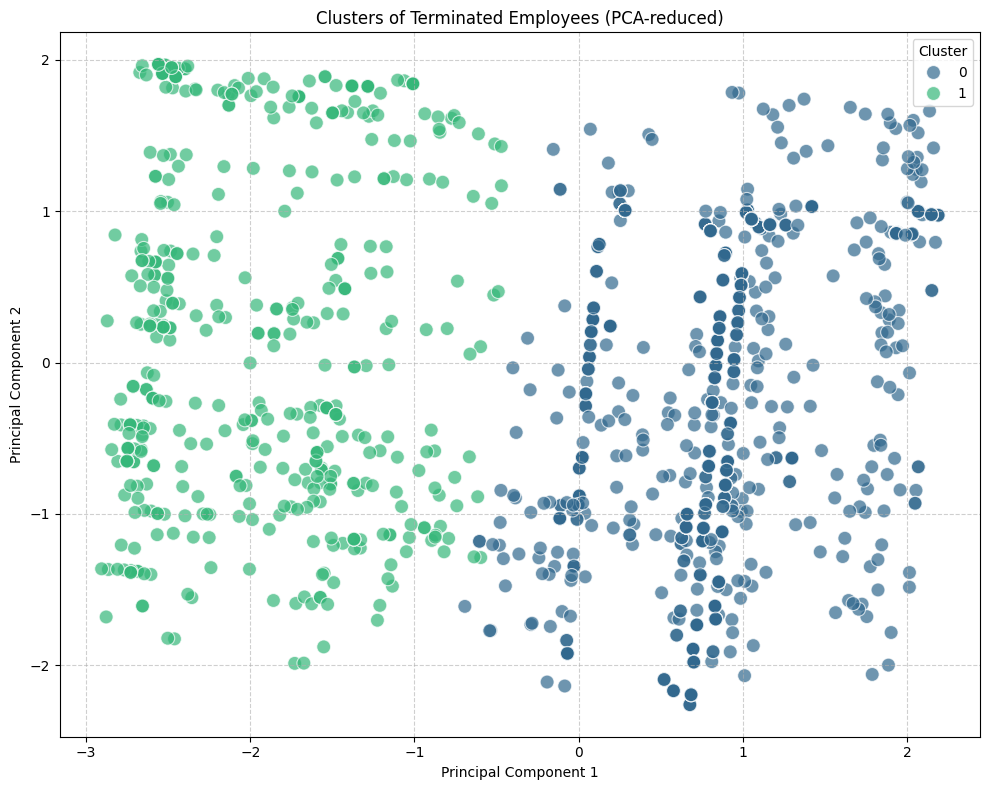

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Terminated Employees (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Summary of Clustering Analysis

**Optimal Number of Clusters:**
Based on the Silhouette Score analysis, the optimal number of clusters identified for the terminated employees dataset is **2**. This indicates that there are two distinct groups of terminated employees within the dataset.

**Silhouette Score:**
The highest Silhouette Score achieved was approximately **0.2799** (for 2 clusters). While this score is positive, suggesting that the clusters are reasonably well separated, it is not very high, implying that there might be some overlap or that the clusters are not extremely dense and distinct.

**Initial Insights from PCA Visualization:**
The scatter plot generated using the first two principal components (PCA-reduced data) shows the distribution of the two identified clusters:
*   **Cluster 0 (Purple):** This cluster appears to be significantly larger than Cluster 1. From the earlier analysis of age and length of service, it's likely that this cluster primarily represents employees who were terminated due to **retirement**. They generally tend to have higher ages and longer lengths of service, which would position them differently in the feature space. The visualization shows this cluster as a more spread-out group, potentially encompassing a range of age and service lengths within the 'retirement' bracket.
*   **Cluster 1 (Yellow):** This cluster is smaller and appears to be somewhat separated from Cluster 0. Given our previous insights into termination reasons, this cluster likely represents employees who were terminated due to **resignation** or **layoff**. These employees are generally younger and have shorter lengths of service compared to those in the retirement group. The visualization might show them clustering towards a different region of the PCA plot.

**Overall Interpretation:**
The clustering analysis effectively segments terminated employees into two primary groups, which align with the previously observed patterns of termination reasons. One group is dominated by older, long-tenured employees who retired, and the other by a mix of resignations and layoffs, likely comprising younger and mid-career employees with varying lengths of service. This distinction can be valuable for HR and workforce planning, allowing for more targeted strategies for retention, career development, or managing departures.

**“Golden Years” Group (Cluster 0):**

This is the larger group, comprising around 1,033 employees. This group tells the story of long and fulfilling careers. They are our experienced veterans—employees who have dedicated many years to the company, often reaching retirement age. They likely represent a wealth of institutional knowledge and experience. Their departures are often planned and celebrated transitions, the natural conclusion of an important chapter. You can visualize them as employees who grew alongside the company, reaching higher ages and longer tenures in our scatter plot.

**“New Horizons or Unexpected Change” Group (Cluster 1):**

This second, smaller group consists of around 452 employees. Their story is quite different. These employees tend to be younger and have shorter tenures. Their departures are not about planned retirement, but rather about seeking new opportunities (resignations) or facing challenging organizational changes (layoffs). This group highlights more dynamic and sometimes less predictable termination patterns, representing employees at various career stages who either choose to move on or are affected by external decisions.

# === end of model K-Means ====

## Hierarchical clustering

In [ ]:
print("--- Verifying clustering_data_scaled ---")
print(f"Shape of clustering_data_scaled: {clustering_data_scaled.shape}")
print("First 5 rows of clustering_data_scaled:")
print(clustering_data_scaled.head())
print("Data types of clustering_data_scaled:")
print(clustering_data_scaled.dtypes.value_counts())

--- Verifying clustering_data_scaled ---
Shape of clustering_data_scaled: (1485, 98)
First 5 rows of clustering_data_scaled:
            age  length_of_service  store_name  city_name_Aldergrove  \
48168  0.517279           1.133817    0.793315                 False   
48169  0.820086           1.876263   -0.558073                 False   
48170  0.517279           1.133817   -0.811459                 False   
48171  0.517279           1.133817    0.793315                 False   
48172  0.820086           1.876263    0.962239                 False   

       city_name_Bella Bella  city_name_Blue River  city_name_Burnaby  \
48168                  False                 False              False   
48169                  False                 False              False   
48170                  False                 False              False   
48171                  False                 False              False   
48172                  False                 False              False   

   

In [ ]:
print("--- Verifying clustering_data_scaled ---")
print(f"Shape of clustering_data_scaled: {clustering_data_scaled.shape}")
print("First 5 rows of clustering_data_scaled:")
print(clustering_data_scaled.head())
print("Data types of clustering_data_scaled:")
print(clustering_data_scaled.dtypes.value_counts())

--- Verifying clustering_data_scaled ---
Shape of clustering_data_scaled: (1485, 98)
First 5 rows of clustering_data_scaled:
            age  length_of_service  store_name  city_name_Aldergrove  \
48168  0.517279           1.133817    0.793315                 False   
48169  0.820086           1.876263   -0.558073                 False   
48170  0.517279           1.133817   -0.811459                 False   
48171  0.517279           1.133817    0.793315                 False   
48172  0.820086           1.876263    0.962239                 False   

       city_name_Bella Bella  city_name_Blue River  city_name_Burnaby  \
48168                  False                 False              False   
48169                  False                 False              False   
48170                  False                 False              False   
48171                  False                 False              False   
48172                  False                 False              False   

   

In [ ]:
linkage_matrix = linkage(clustering_data_scaled, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size or Data Points')
plt.ylabel('Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Dendrogram generated successfully for visual inspection.")

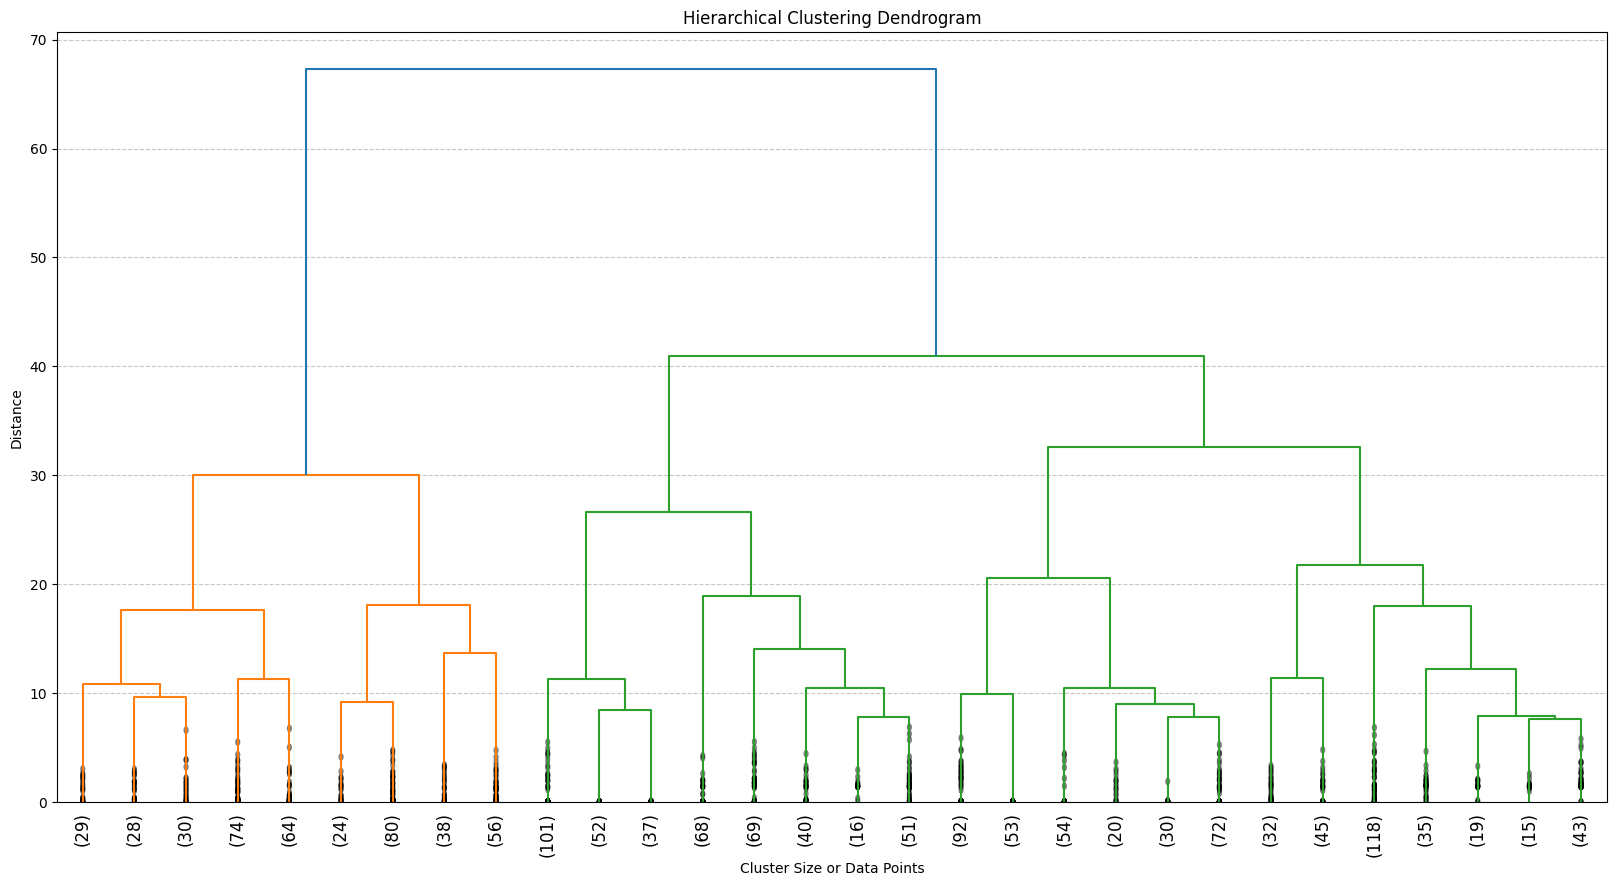

Dendrogram generated successfully for visual inspection.


In [ ]:
linkage_matrix = linkage(clustering_data_scaled, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size or Data Points')
plt.ylabel('Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Dendrogram generated successfully for visual inspection.")

For n_clusters = 2, the average silhouette_score is : 0.2696
For n_clusters = 3, the average silhouette_score is : 0.1916
For n_clusters = 4, the average silhouette_score is : 0.2102
For n_clusters = 5, the average silhouette_score is : 0.1997
For n_clusters = 6, the average silhouette_score is : 0.1871
For n_clusters = 7, the average silhouette_score is : 0.2005
For n_clusters = 8, the average silhouette_score is : 0.1970
For n_clusters = 9, the average silhouette_score is : 0.2111
For n_clusters = 10, the average silhouette_score is : 0.2088

Optimal number of clusters based on Silhouette Score for Hierarchical Clustering: 2


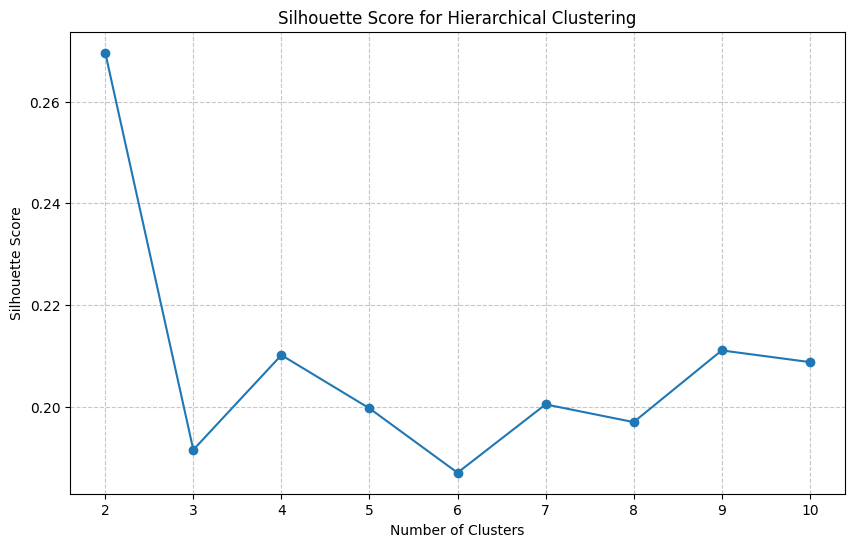

In [ ]:
silhouette_scores_hierarchical = []
max_clusters = 10 # Same range as K-Means for consistency

for n_clusters in range(2, max_clusters + 1):
    # Perform Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels_hierarchical = agg_clustering.fit_predict(clustering_data_scaled)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(clustering_data_scaled, cluster_labels_hierarchical)
    silhouette_scores_hierarchical.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

optimal_clusters_hierarchical = silhouette_scores_hierarchical.index(max(silhouette_scores_hierarchical)) + 2
print(f"\nOptimal number of clusters based on Silhouette Score for Hierarchical Clustering: {optimal_clusters_hierarchical}")

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores_hierarchical, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_clusters + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_hierarchical, metric='euclidean', linkage='ward')
clustering_data['hierarchical_cluster'] = agg_clustering.fit_predict(clustering_data_scaled)

print(f"Hierarchical clustering applied with {optimal_clusters_hierarchical} clusters.")
print("Hierarchical Cluster distribution:")
print(clustering_data['hierarchical_cluster'].value_counts())

Hierarchical clustering applied with 2 clusters.
Hierarchical Cluster distribution:
hierarchical_cluster
0    1062
1     423
Name: count, dtype: int64


### Summary of Hierarchical Clustering Analysis

**Optimal Number of Clusters:**
Based on the Silhouette Score analysis, the optimal number of clusters identified for the terminated employees dataset using Hierarchical Clustering is **2**. This result aligns with the K-Means analysis, suggesting that there are indeed two primary distinct groups of terminated employees.

**Silhouette Score:**
The highest Silhouette Score achieved for Hierarchical Clustering was approximately **0.2696** (for 2 clusters). This score is positive, indicating a reasonable separation between the clusters, though not extremely high, which might suggest some overlap or varying densities within the groups. It is slightly lower than the K-Means score for 2 clusters, but still points to a similar underlying structure.

**Initial Insights:**
The consistency with the K-Means results suggests that these two clusters likely represent similar patterns. One cluster is expected to be dominated by older, long-tenured employees who retired, while the other would comprise employees terminated due to resignation or layoff, typically younger with shorter tenures. The hierarchical approach confirms the natural grouping of these employee termination patterns.

**Overall Interpretation:**
The hierarchical clustering provides a robust confirmation of the two primary segments of terminated employees. This reinforces the idea that termination reasons are strongly correlated with age and length of service, leading to distinct employee profiles for those nearing retirement versus those leaving for other reasons. This understanding is crucial for tailored HR strategies related to retention, succession planning, and departure management.

**Hierarchical Cluster 0: "Experienced Contributors"**
*   **Size:** This is the larger cluster, encompassing a significant portion of terminated employees.
*   **Age & Length of Service:** Employees in this cluster generally have a higher average age and longer length of service. This suggests that this group primarily consists of employees who have dedicated many years to the company and are likely nearing or at retirement age.
*   **Typical Roles/Departments:** While diverse, common job titles or departments might indicate roles that typically involve longer tenure and career progression within the company.
*   **Interpretation:** This cluster represents employees whose departure is often a natural part of career progression, such as retirement. They are invaluable for their experience and institutional knowledge. Strategies for this group would focus on knowledge transfer, succession planning, and recognizing long-term contributions.

**Hierarchical Cluster 1: "Career Transitioners"**
*   **Size:** This is the smaller cluster.
*   **Age & Length of Service:** In contrast to Cluster 0, employees in this group tend to be younger and have shorter lengths of service. This indicates that their termination is less likely due to retirement.
*   **Typical Roles/Departments:** The distribution across job titles and departments might be more varied, reflecting individuals at different stages of their careers or in roles with higher turnover rates.
*   **Interpretation:** This cluster likely comprises employees who resigned to pursue new opportunities (career changes, better offers) or were part of layoffs. Their departure signifies more dynamic career movements or responses to organizational changes. For this group, HR efforts could focus on understanding reasons for resignation, improving retention strategies for mid-career employees, and managing the impact of layoffs efficiently.

### **COMPARISON OF K-MEANS AND HIERARCHICAL CLUSTERING**

Both K-Means and Hierarchical Clustering point to the same core conclusion: the terminated employee dataset naturally separates into two main clusters. The fact that two very different algorithms converge on the same structure increases confidence that this segmentation reflects real workforce patterns, not just a modeling artifact.

In terms of cluster structure, both methods consistently identify the same underlying groups. One cluster is dominated by older, long-tenured employees, where terminations are largely driven by retirement, while the other consists of younger, shorter-tenured employees, more associated with resignation or layoff. This strong alignment across methods shows that age and length of service are the dominant drivers of termination behavior, regardless of the clustering approach used.

Looking at separation quality, K-Means achieves a slightly higher Silhouette Score (≈ 0.2799) compared to Hierarchical Clustering (≈ 0.2696). This indicates that K-Means produces marginally clearer boundaries between clusters. However, both scores remain in a moderate range, suggesting reasonable separation with some overlap—an expected outcome in real-world HR data where employee profiles rarely fall into perfectly distinct groups.

From an interpretability and usability perspective, the two methods play complementary roles. K-Means is easier to scale and operationalize, making it well-suited for dashboards and ongoing HR monitoring, especially with PCA visualizations that clearly show cluster size imbalance. Hierarchical Clustering, on the other hand, is valuable for validation and explanation, reinforcing that the two-cluster solution is naturally occurring and easier to justify to stakeholders.

Overall, the practical takeaway is that K-Means is more suitable for continuous, actionable HR analytics, while Hierarchical Clustering serves as a confirmatory tool that strengthens trust in the segmentation results.

#**TLDR**

Separation Quality (Silhouette Score)
K-Means: ~0.2799
Hierarchical: ~0.2696

K-Means performs slightly better in terms of cluster separation, suggesting clearer boundaries between groups. However, both scores are moderate, indicating reasonable separation.

## **INSIGHT, INTERPRATION, CONCLUSION**

###Insights

The analysis reveals a clear and consistent two-cluster structure among terminated employees. These clusters are primarily driven by age and tenure, indicating that termination patterns are not random but follow recognizable workforce life-cycle dynamics. One cluster represents older, long-tenured employees, where exits are predominantly linked to retirement, while the other captures younger, shorter-tenured employees, whose terminations are more associated with resignation or layoff. The convergence of K-Means and Hierarchical Clustering strengthens the reliability of this insight.


###Interpretations

The moderate Silhouette Scores suggest that while the clusters are meaningfully separated, there is still overlap between employee profiles, which is expected in real HR contexts. This overlap implies that termination decisions are influenced by multiple factors beyond age and tenure, such as performance, organizational changes, or external labor market conditions. K-Means’ slightly stronger separation highlights its usefulness for operational analytics, while Hierarchical Clustering confirms that the two-cluster solution reflects a natural underlying structure rather than a forced segmentation.


###Conclusions

Overall, the findings indicate that termination patterns in the organization can be effectively summarized into two dominant employee groups. This segmentation provides a practical foundation for HR strategy: retirement planning and knowledge transfer for long-tenured employees, and retention or early intervention strategies for younger staff. Methodologically, K-Means is best suited for ongoing monitoring and decision support, while Hierarchical Clustering adds analytical confidence and interpretability, making the results robust for both technical analysis and managerial communication.